### Decision Tree Regressor Overview

#### **Algorithm Overview**
A **Decision Tree Regressor** is a supervised learning algorithm used for regression tasks. It builds a tree-like model of decisions by recursively splitting the data based on feature values. At each node, the algorithm splits the data in a way that minimizes the **mean squared error (MSE)** between the predicted and actual values.

#### **How scikit-learn Implements Decision Trees**
Scikit-learn implements decision trees using the **CART (Classification and Regression Trees)** algorithm. For regression tasks, the algorithm minimizes the MSE at each split.

- **Split Selection**: At each node, the algorithm considers every feature and all possible split values, selecting the one that minimizes MSE.
- **Stopping Criteria**: The tree grows until a stopping condition is met, such as reaching a max depth (`max_depth`) or minimum samples at a node (`min_samples_split`).
- **Pruning**: The tree can be pruned to avoid overfitting by limiting its depth or the minimum number of samples per leaf.

#### **Advantages**
- **Easy to Interpret**: The tree structure is intuitive, and the model is easy to explain.
- **Captures Non-Linear Relationships**: Unlike linear models, decision trees handle non-linear relationships effectively.
- **No Need for Feature Scaling**: Decision trees do not require normalization or standardization of features.
- **Handles Missing Values**: Can handle missing data (depending on the implementation).

#### **Disadvantages**
- **Overfitting**: Decision trees can overfit, especially when they are deep. Pruning and limiting depth can help mitigate this.
- **Instability**: Small changes in data can lead to large changes in the tree structure.
- **Bias Toward Features with More Levels**: Tends to favor features with more categories.
- **Poor Performance on Smooth Functions**: Struggles with predicting smooth functions; other techniques like linear regression might perform better in such cases.

### Dataset Overview

In this notebook, we apply the **Decision Tree Regressor** to the **California Housing Dataset** to predict the **median house value** based on various district-level features.

#### **Dataset Details**
- **Instances**: 20,640
- **Features**: 8 numerical attributes, including **median income**, **house age**, **average rooms**, and **latitude/longitude**.
- **Target**: **MedHouseVal** – Median house value in thousands of dollars.

In [1]:
# Necessary Imports
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Load the California housing dataset
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.Series(california_housing.target)

# Train-test split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Decision Tree Regressor
# Train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_reg = dt_regressor.predict(X_test)

# Mean Squared Error for regression
mse_value = mean_squared_error(y_test, y_pred_reg)
print(f"Decision Tree Regressor Mean Squared Error: {mse_value:.4f}")


Decision Tree Regressor Mean Squared Error: 0.5211


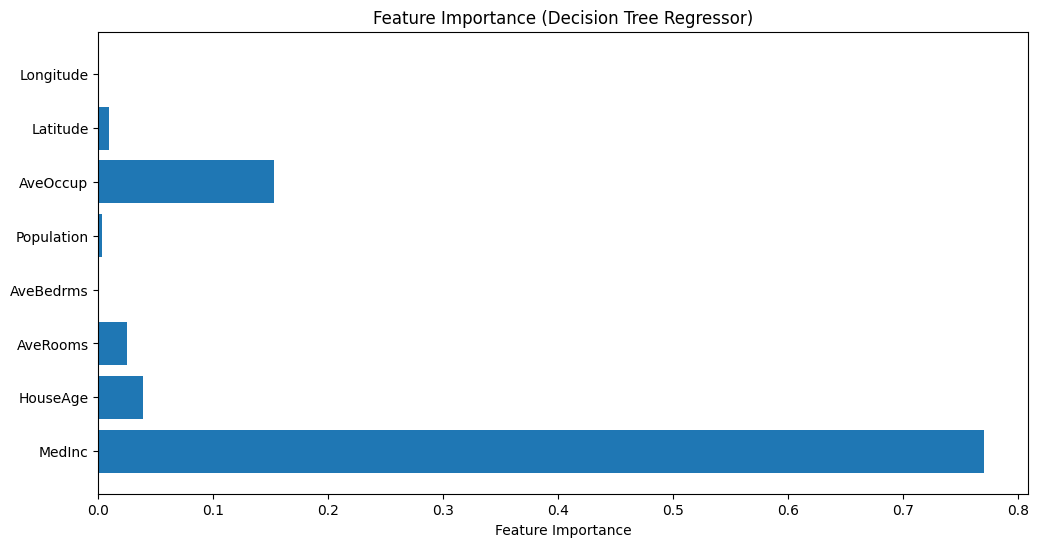

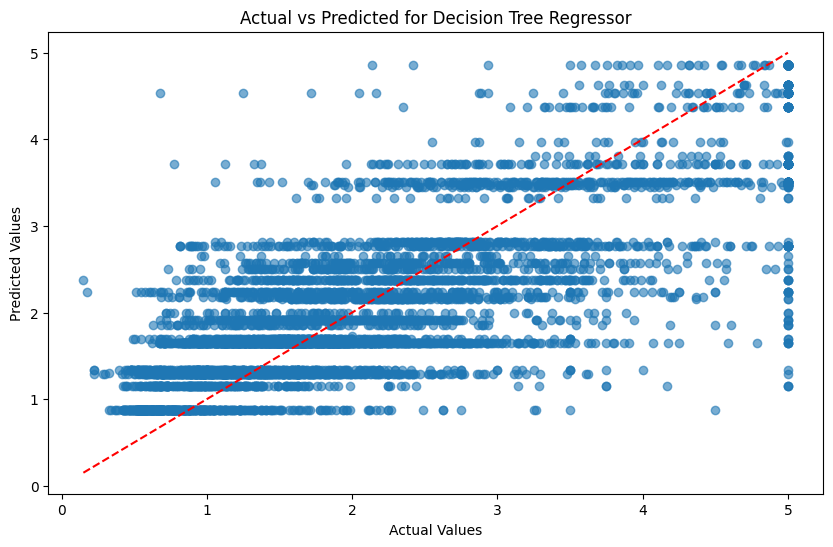

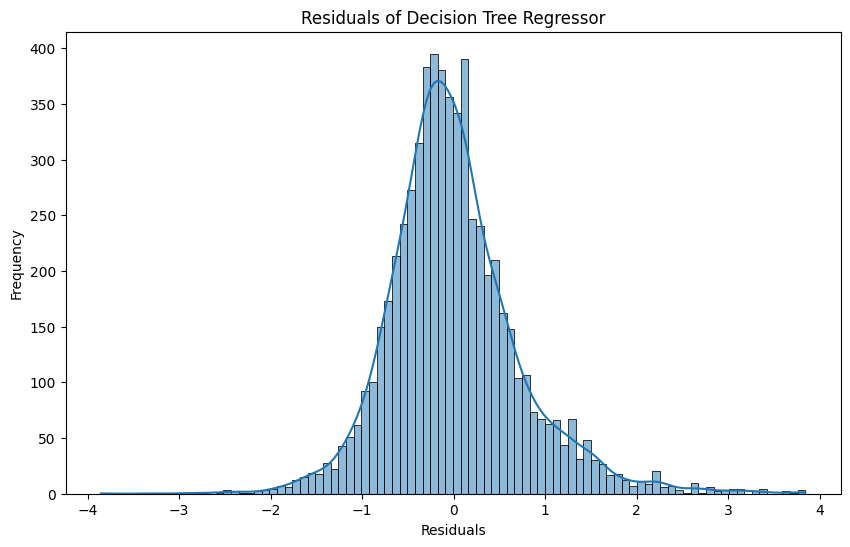

In [16]:

# Feature Importance for Decision Tree Regressor
plt.figure(figsize=(12, 6))
plt.barh(X.columns, dt_regressor.feature_importances_)
plt.title("Feature Importance (Decision Tree Regressor)")
plt.xlabel("Feature Importance")
plt.show()

# Plot Actual vs Predicted for the Regression Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_reg, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted for Decision Tree Regressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Plot Residuals for Regression Tree
residuals = y_test - y_pred_reg
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Residuals of Decision Tree Regressor")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

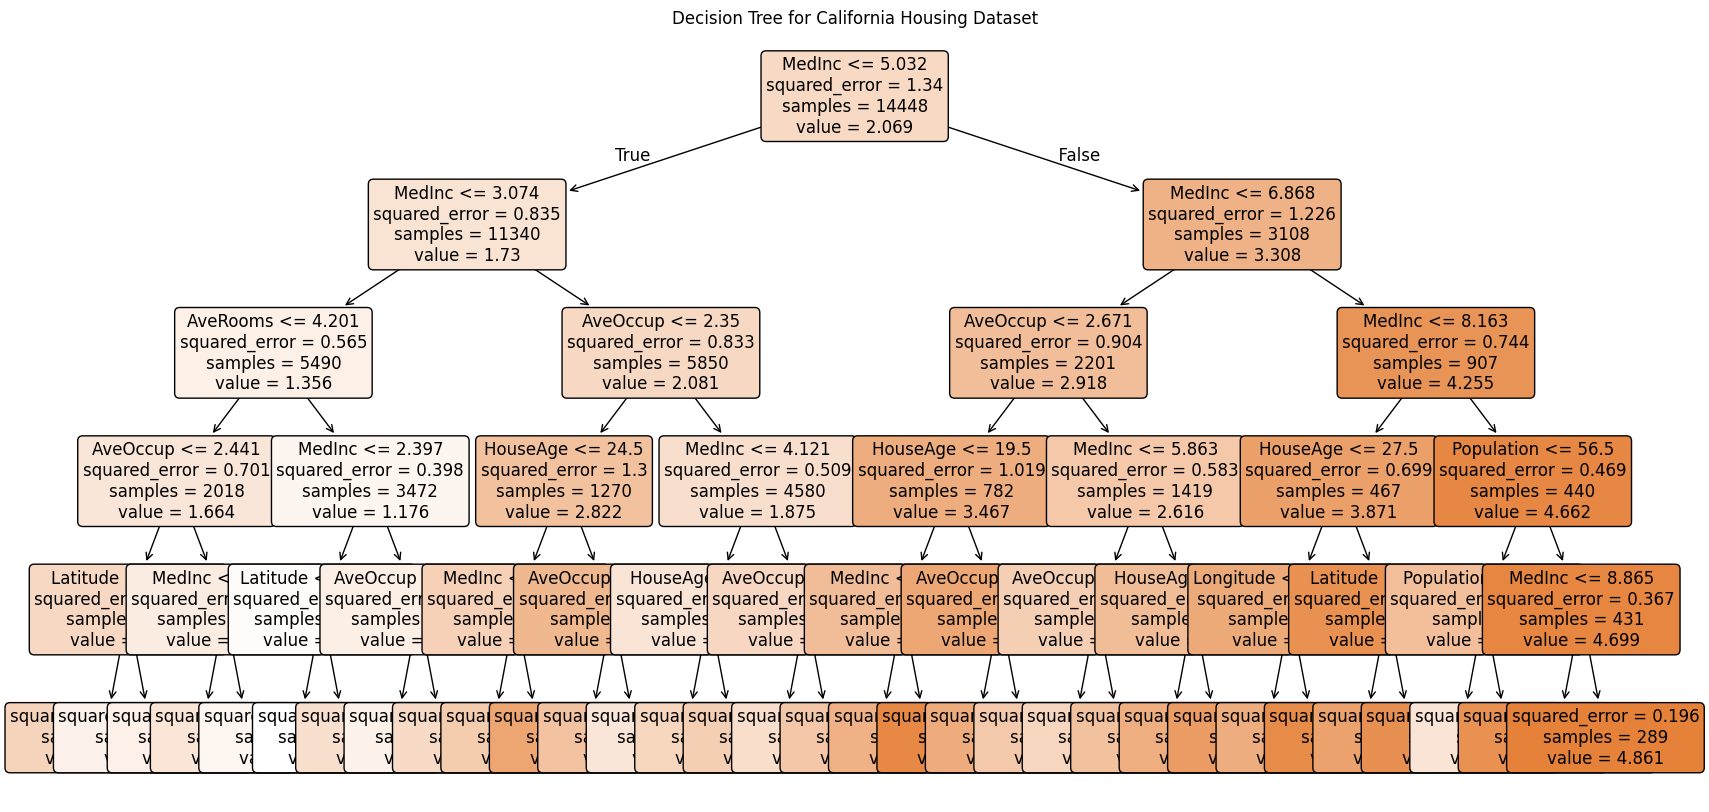

In [19]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_regressor,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Decision Tree for California Housing Dataset")
plt.show()

### Results and Discussion

#### **Feature Importance**
The **Feature Importance** bar chart reveals that the most influential feature in predicting the **median house value** is **MedInc (Median Income)**, followed by **AveOccup (Average Occupancy)** and **HouseAge (House Age)**. Features such as **Longitude**, **Latitude**, and **Population** have lower importance. This suggests that **MedInc** and **AveOccup** play a significant role in determining house prices, which aligns with real-world expectations, as higher-income areas and population density are often correlated with more expensive housing markets.

#### **Actual vs Predicted Values**
The scatter plot comparing **Actual** vs **Predicted** values for the **Decision Tree Regressor** shows a good correlation between the actual and predicted values. The points generally lie near the red dashed line, which indicates a good fit. However, some deviation from the line, especially at higher values, suggests that the decision tree model may struggle with extreme values or outliers. This is a common challenge in decision tree models, especially with large and diverse datasets like the California Housing dataset.

#### **Residuals**
The **Residuals Plot** shows a slightly skewed distribution around zero, indicating that the model may be underestimating or overestimating certain values. Ideally, the residuals should be randomly scattered around zero, which would suggest that the model has captured the underlying patterns in the data well. In this case, the residuals are somewhat concentrated around zero but show a slight bias toward overestimation, particularly for values around 1.5 and below. This suggests that while the decision tree model performs well overall, it may benefit from further tuning or use in ensemble methods to address these biases.

#### **Decision Tree Structure**
The **Decision Tree Visualization** reveals how the model splits the data based on various features. The first split is based on **MedInc**, showing that the decision tree considers income as a crucial factor in predicting house values. Further splits involve **AveOccup**, **HouseAge**, and other features. Each node provides insights into how the model partitions the data, with "squared_error" indicating the variance within each group. While the tree is interpretable, it also shows a depth of 5, which means the tree is relatively shallow, helping mitigate overfitting, though it may not capture all the nuances in the data.

#### **Discussion**
- The **Decision Tree Regressor** provides a reasonable model for predicting **median house values** in California districts, with good performance indicated by the scatter plot and residuals.
- The feature importance plot highlights **MedInc** and **AveOccup** as the most influential factors, which are consistent with expectations from real estate economics.
- Some residuals indicate minor overestimations, suggesting the need for tuning the tree or using more complex models like **Random Forests** or **Gradient Boosting** to reduce bias and increase predictive accuracy.
- The visualized decision tree structure demonstrates that the model can be interpreted clearly, but its simplicity may limit its performance in capturing more complex patterns.
